In [10]:
import matplotlib.pyplot as plt 
from numpy import array, zeros 
from statistics import mean
from sklearn.metrics import r2_score
import pandas as pd

In [11]:
df = pd.read_excel("ML_practical_1_dataset.xlsx")
df

,CGPA,CGPA .1,SALARY
0,NaN,6.10,0.00
1,NaN,6.15,2.50
2,NaN,6.30,2.25
3,NaN,7.24,6.00
4,NaN,7.50,3.30
5,NaN,7.50,3.75
6,NaN,7.90,4.50
7,NaN,8.00,3.30
8,NaN,8.90,4.00
9,NaN,9.10,3.50


In [12]:
cgpa=df['CGPA .1'].to_numpy()
salary=df['SALARY'].to_numpy()
nr,dr=0,0
average_cgpa,average_salary=mean(cgpa),mean(salary)

In [13]:
for i in range (len(cgpa)):
    nr+=(cgpa[i]-average_cgpa)*(salary[i]-average_salary)
    dr+=(cgpa[i]-average_cgpa)**2

In [14]:
slope=nr/dr
y_int=average_salary-slope*average_cgpa
print('Equation of the best fit line is : y=' + f'{slope: .2f}*x + {y_int: .2f}')

Equation of the best fit line is : y= 2.12*x + -11.85


In [15]:
pred_salary =zeros((len(cgpa), 1))
for i in range (len(cgpa)):
    pred_salary[i]=slope*cgpa[i]+y_int
score_r2=round(r2_score(salary,pred_salary),2)
print('R2 Score:',score_r2)

R2 Score: 0.51


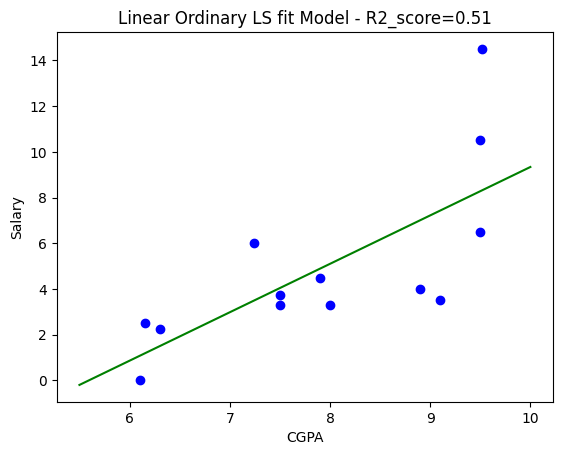

In [16]:
plt.scatter(cgpa,salary,color = 'blue')
plt.xlabel('CGPA')
plt.ylabel('Salary')
plt.title(f"Linear Ordinary LS fit Model - R2_score={score_r2}")
plt.plot([5.5,10],slope*array([5.5,10.0])+y_int,'green')

7.449522973746067
predicted salary fot the students1 with cgpa9.11 is Rs  7.45 Lac
predicted salary fot the students2 with cgpa5.25 is Rs -0.73 Lac
6.326710011255241
predicted salary fot the students3 with cgpa8.58 is Rs  6.33 Lac
3.530270180146008
predicted salary fot the students4 with cgpa7.26 is Rs  3.53 Lac
9.01722409118609
predicted salary fot the students5 with cgpa9.85 is Rs  9.02 Lac


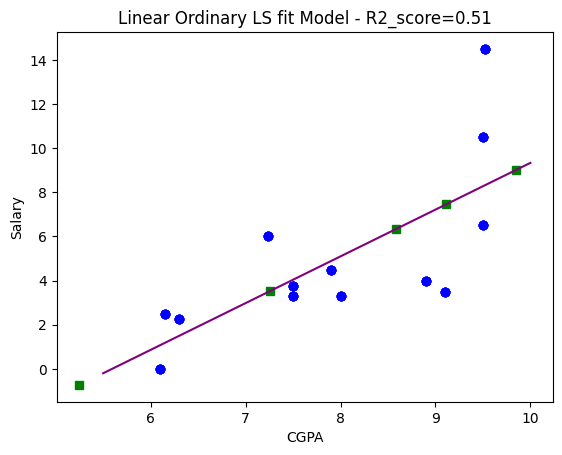

In [17]:
pred_cgpa=array([9.11,5.25,8.58,7.26,9.85])
response_salary=slope*pred_cgpa+y_int
for i in range(len(pred_cgpa)):
    response_salary[i]=response_salary[i]
    if response_salary[i]> 0:
        print(response_salary[i])
        
    else:
        0
    plt.plot(pred_cgpa[i],response_salary[i],'gs')
    print(f'predicted salary fot the students{i+1} with cgpa' + f'{pred_cgpa[i]} is Rs {response_salary[i]: .2f} Lac')
    plt.scatter(cgpa,salary,color = 'blue')
plt.xlabel('CGPA')
plt.ylabel('Salary')
plt.title(f"Linear Ordinary LS fit Model - R2_score={score_r2}")
plt.plot([5.5,10],slope*array([5.5,10.0])+y_int,'purple')
